In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv("Avocado.csv")
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
data.shape

(18249, 13)

In [4]:
data.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [5]:
data['Date']=pd.to_datetime(data['Date'])
data["Month"] = data["Date"].dt.month
data["Day"] = data["Date"].dt.day
data.drop("Date",axis=1,inplace=True)

In [6]:
data.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
Month             int64
Day               int64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


In [8]:
data.isnull().sum().sum()

0

In [9]:
data.drop_duplicates(inplace=True)
data.shape

(18249, 14)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 2.1+ MB


In [11]:
data.drop_duplicates(inplace=True)
data.shape

(18249, 14)

# Finding the Region from the data by Classification

In [12]:
data['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [13]:
data["region"].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [14]:
data.shape

(18249, 14)

Encoding the categorical columns using Label Encoding

In [15]:
categorical_col = ["type","region"]
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
data[categorical_col]= data[categorical_col].apply(LE.fit_transform)
data[categorical_col]

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
18244,1,53
18245,1,53
18246,1,53
18247,1,53


In [16]:
#Correlation
data.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716,0.075134,0.061157
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176,-0.015344,-0.013212
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073,-0.014522,-0.014375
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726,-0.015892,-0.014567
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252,-0.024220,-0.012446
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256,-0.013061,-0.008687
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702,-0.012432,-0.007999
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768,-0.014330,-0.010477
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281,-0.006182,-0.002364
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280,0.000017,-0.000052


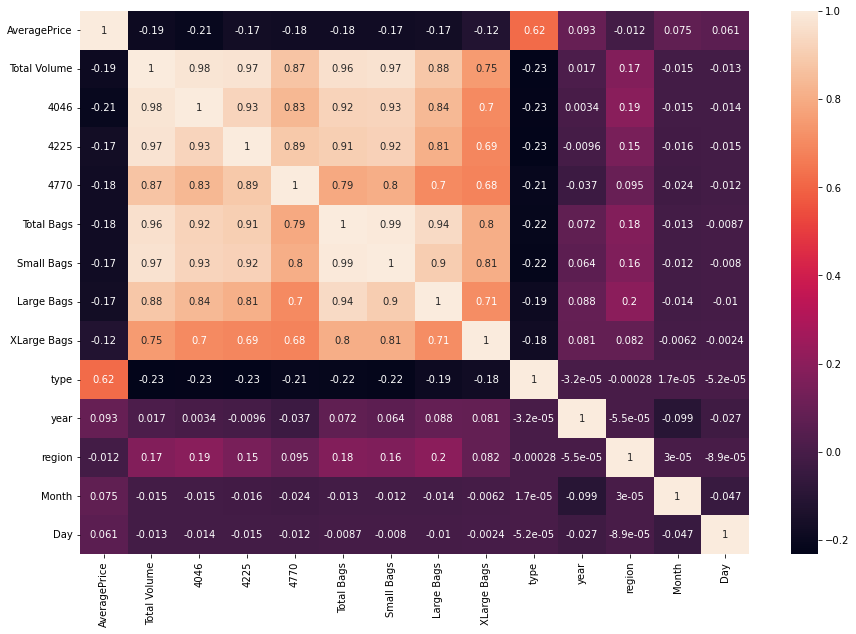

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)
cor=data.corr()

In [18]:
#correlation with targetvariable
cor['region'].sort_values(ascending=False)

region          1.000000
Large Bags      0.198768
4046            0.192073
Total Bags      0.175256
Total Volume    0.174176
Small Bags      0.164702
4225            0.145726
4770            0.095252
XLarge Bags     0.082281
Month           0.000030
year           -0.000055
Day            -0.000089
type           -0.000280
AveragePrice   -0.011716
Name: region, dtype: float64

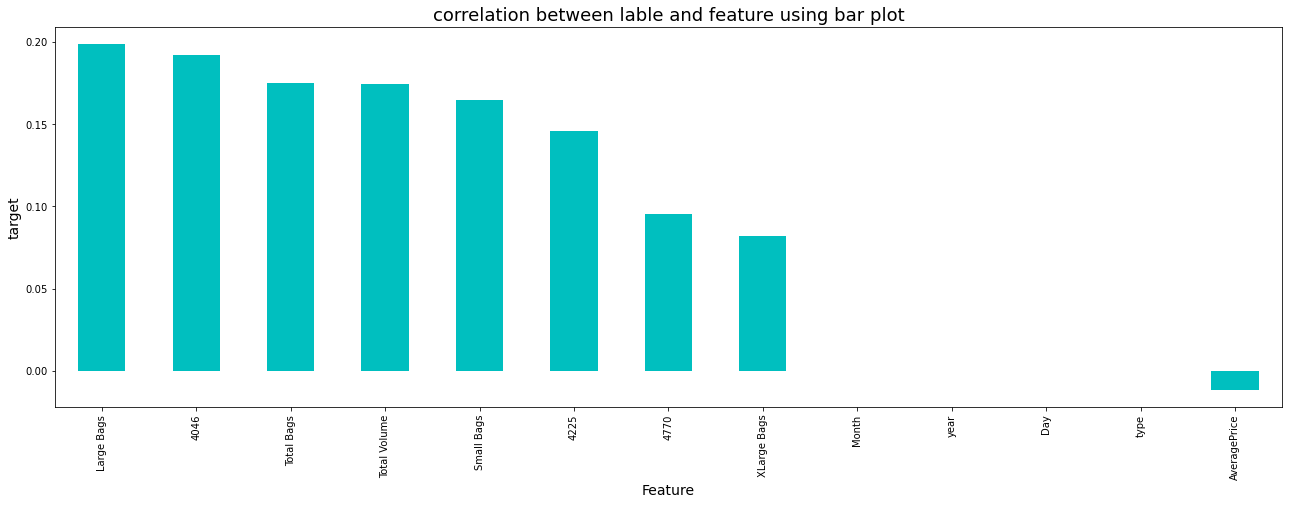

In [19]:
plt.figure(figsize=(22,7))
data.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lable and feature using bar plot',fontsize=18)
plt.show()

In [21]:
data.drop("Date",axis=1, inplace=True)
data.drop("year",axis=1, inplace=True)

In [23]:
x = data.drop("region", axis=1)
y = data["region"]
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,4,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,1,14


In [24]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [25]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns

#check the values
vif

,VIF values,Features
0,1.687452e+00,AveragePrice
1,4.913852e+09,Total Volume
2,6.592675e+08,4046
3,5.973507e+08,4225
4,4.758012e+06,4770
5,2.370316e+14,Total Bags
6,1.364727e+14,Small Bags
7,1.448103e+13,Large Bags
8,7.621787e+10,XLarge Bags
9,1.681164e+00,type


In [26]:
x.drop('Total Volume',inplace=True,axis=1)

In [27]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns

#check the values
vif

,VIF values,Features
0,1.687401e+00,AveragePrice
1,1.006587e+01,4046
2,1.347834e+01,4225
3,5.371624e+00,4770
4,2.370316e+14,Total Bags
5,1.364727e+14,Small Bags
6,1.448103e+13,Large Bags
7,7.621787e+10,XLarge Bags
8,1.678919e+00,type
9,1.013111e+00,Month


In [28]:
x.drop('Total Bags',axis=True,inplace=True)
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns

#check the values
vif

,VIF values,Features
0,1.687401,AveragePrice
1,10.063114,4046
2,13.476527,4225
3,5.371603,4770
4,19.346141,Small Bags
5,5.541484,Large Bags
6,3.413409,XLarge Bags
7,1.678872,type
8,1.012943,Month
9,1.009619,Day


In [31]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,400):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7901369863013699  on Random_state  304


In [33]:
#spliting the data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=51)

In [34]:
# Checking Accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

#Prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.7881278538812785
[[ 81   0   0 ...   0   0   0]
 [  0  76   0 ...   0   0   0]
 [  0   0  95 ...   0   0   1]
 ...
 [  0   0   0 ... 111   0   0]
 [  0   0   0 ...   1  95   0]
 [  0   2   2 ...   0   0  67]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       105
           1       0.72      0.72      0.72       105
           2       0.89      0.88      0.88       108
           3       0.83      0.78      0.80       109
           4       0.77      0.85      0.81        95
           5       0.68      0.74      0.71       104
           6       0.95      0.95      0.95        99
           7       0.86      0.84      0.85       110
           8       0.92      0.94      0.93        93
           9       0.79      0.86      0.82       107
          10       0.75      0.68      0.72        98
          11       0.84      0.83      0.84       114
          12       0.85      0.80      0.82       116
          13       0.81      0.7

In [35]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8957077625570776
[[ 98   0   0 ...   0   0   0]
 [  0  88   0 ...   0   0   0]
 [  0   0 106 ...   0   0   0]
 ...
 [  0   0   0 ... 111   0   0]
 [  0   0   0 ...   1 102   0]
 [  0   1   2 ...   0   0  80]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       105
           1       0.80      0.84      0.82       105
           2       0.95      0.98      0.97       108
           3       0.91      0.76      0.83       109
           4       0.88      0.94      0.91        95
           5       0.86      0.82      0.84       104
           6       0.98      1.00      0.99        99
           7       0.91      0.87      0.89       110
           8       0.97      0.99      0.98        93
           9       0.93      0.93      0.93       107
          10       0.78      0.89      0.83        98
          11       0.98      0.96      0.97       114
          12       0.95      0.91      0.93       116
          13       0.86      0.8

# Logistic Regression- Model Building

In [36]:
# Checking accuracy for Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.3092237442922374
[[31  0  0 ...  0  0  0]
 [ 7 22  0 ...  0  0  0]
 [ 0  0 40 ...  0  0  0]
 ...
 [ 0  0  0 ... 95 12  0]
 [ 0  0  0 ...  2 66  0]
 [ 4  0  0 ...  0  0 18]]
              precision    recall  f1-score   support

           0       0.12      0.30      0.17       105
           1       0.61      0.21      0.31       105
           2       0.73      0.37      0.49       108
           3       0.37      0.28      0.31       109
           4       0.26      0.25      0.25        95
           5       0.13      0.13      0.13       104
           6       0.68      0.61      0.64        99
           7       0.46      0.25      0.33       110
           8       0.22      0.52      0.31        93
           9       0.37      0.46      0.41       107
          10       0.14      0.28      0.19        98
          11       0.35      0.46      0.39       114
          12       0.49      0.39      0.43       116
          13       0.16      0.37      0.22       106
          14  

In [38]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.2193607305936073
[[ 5  0  0 ...  0  0  0]
 [ 4 10  0 ...  0  0  5]
 [ 4  0  8 ...  0  0  0]
 ...
 [ 0  0  0 ... 91  2  0]
 [ 0  0  0 ...  0 52  0]
 [ 0  5  0 ...  0  0 31]]
              precision    recall  f1-score   support

           0       0.04      0.05      0.04       105
           1       0.32      0.10      0.15       105
           2       0.73      0.07      0.13       108
           3       0.10      0.02      0.03       109
           4       0.02      0.03      0.03        95
           5       0.04      0.12      0.06       104
           6       0.92      0.47      0.63        99
           7       0.00      0.00      0.00       110
           8       0.61      0.53      0.57        93
           9       0.56      0.08      0.15       107
          10       0.04      0.08      0.05        98
          11       0.35      0.43      0.38       114
          12       0.78      0.36      0.49       116
          13       0.89      0.30      0.45       106
          14  

In [42]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

# cv score for Logistic Regression Classifier
print(cross_val_score(LR,x,y,cv=5).mean())

# cv score for Support Vector  Classifier
print(cross_val_score(svc,x,y,cv=5).mean())



0.5561318131820691
0.6807939424199537
0.2620874925387703
0.2027434350563299


In [43]:
# Random forest classifier
rfc=RandomForestClassifier()
parameters={"n_estimators":[10,50,100,120,150],"max_features": ["auto", "sqrt", "log2"]}

In [44]:
GCV=GridSearchCV(rfc,parameters,cv=5)
GCV.fit(x_train,y_train)
print(GCV.best_params_)

{'max_features': 'sqrt', 'n_estimators': 150}


In [45]:
region_model = RandomForestClassifier(max_features='auto',n_estimators=150 )
region_model.fit(x_train, y_train)
pred = region_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

89.6986301369863


In [46]:
#Savving the modeli
import joblib
joblib.dump(region_model,"Avacado_region.pkl")

['Avacado_region.pkl']

In [47]:
#Model Prediction
#Loading the saved model
model=joblib.load("Avacado_region.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([46,  7, 14, ..., 26,  3,  2])

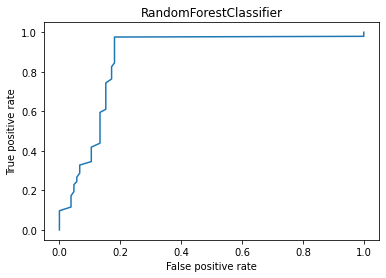

In [48]:
#ROC-AUC Curve
tpr,fpr,thresholds = roc_curve(y_test,prediction,pos_label=True)
plt.plot(fpr,tpr,label = 'RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()

In [49]:
a=np.array(y_test)
result=pd.DataFrame({"Original":a,"Predicted":prediction})
result

,Original,Predicted
0,46,46
1,7,7
2,14,14
3,1,1
4,22,22
...,...,...
5470,2,8
5471,1,48
5472,26,26
5473,3,3


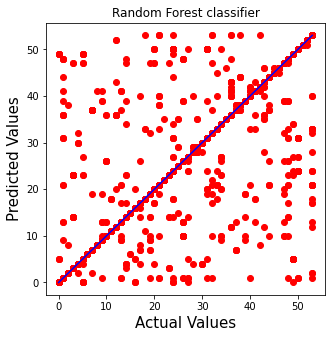

In [50]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, prediction, c='r')
plt1 = max(max(prediction), max(y_test))
plt2 = min(min(prediction), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Random Forest classifier")
plt.show()

# Finding the average price by Regression Model

Data Visualization

In [54]:
#Seperating numerical columns
numerical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'region', 'Month', 'Day']


In [55]:
#Seprerating categorical columns
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

[]


0    9126
1    9123
Name: type, dtype: int64


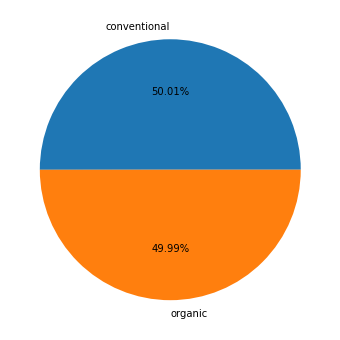

<AxesSubplot:xlabel='type', ylabel='Count'>

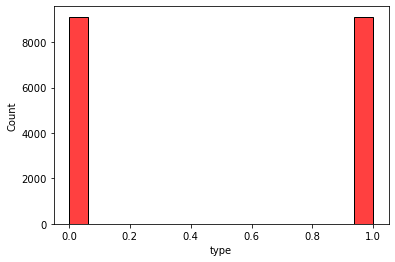

In [57]:
#Visualize the count of 'type'feature of the avocado
print(data["type"].value_counts())
labels='conventional','organic'
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(data['type'].value_counts(), labels=labels, autopct='%1.2f%%')

plt.show()
sns.histplot(data = data, x = 'type', stat = 'count', color = 'Red', legend = True)

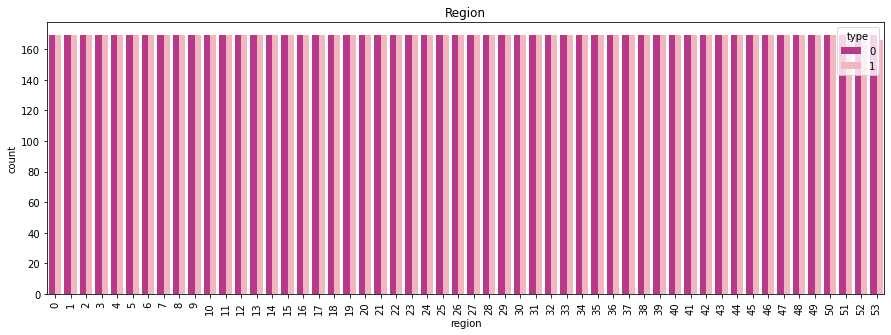

In [66]:
#Visualize the count of Region
plt.figure(figsize=(15,5))
sns.countplot(data["region"],palette="RdPu_r",hue=data['type'])
plt.title("Region")
plt.xticks(rotation=90)
plt.show()

<Figure size 1800x1800 with 0 Axes>

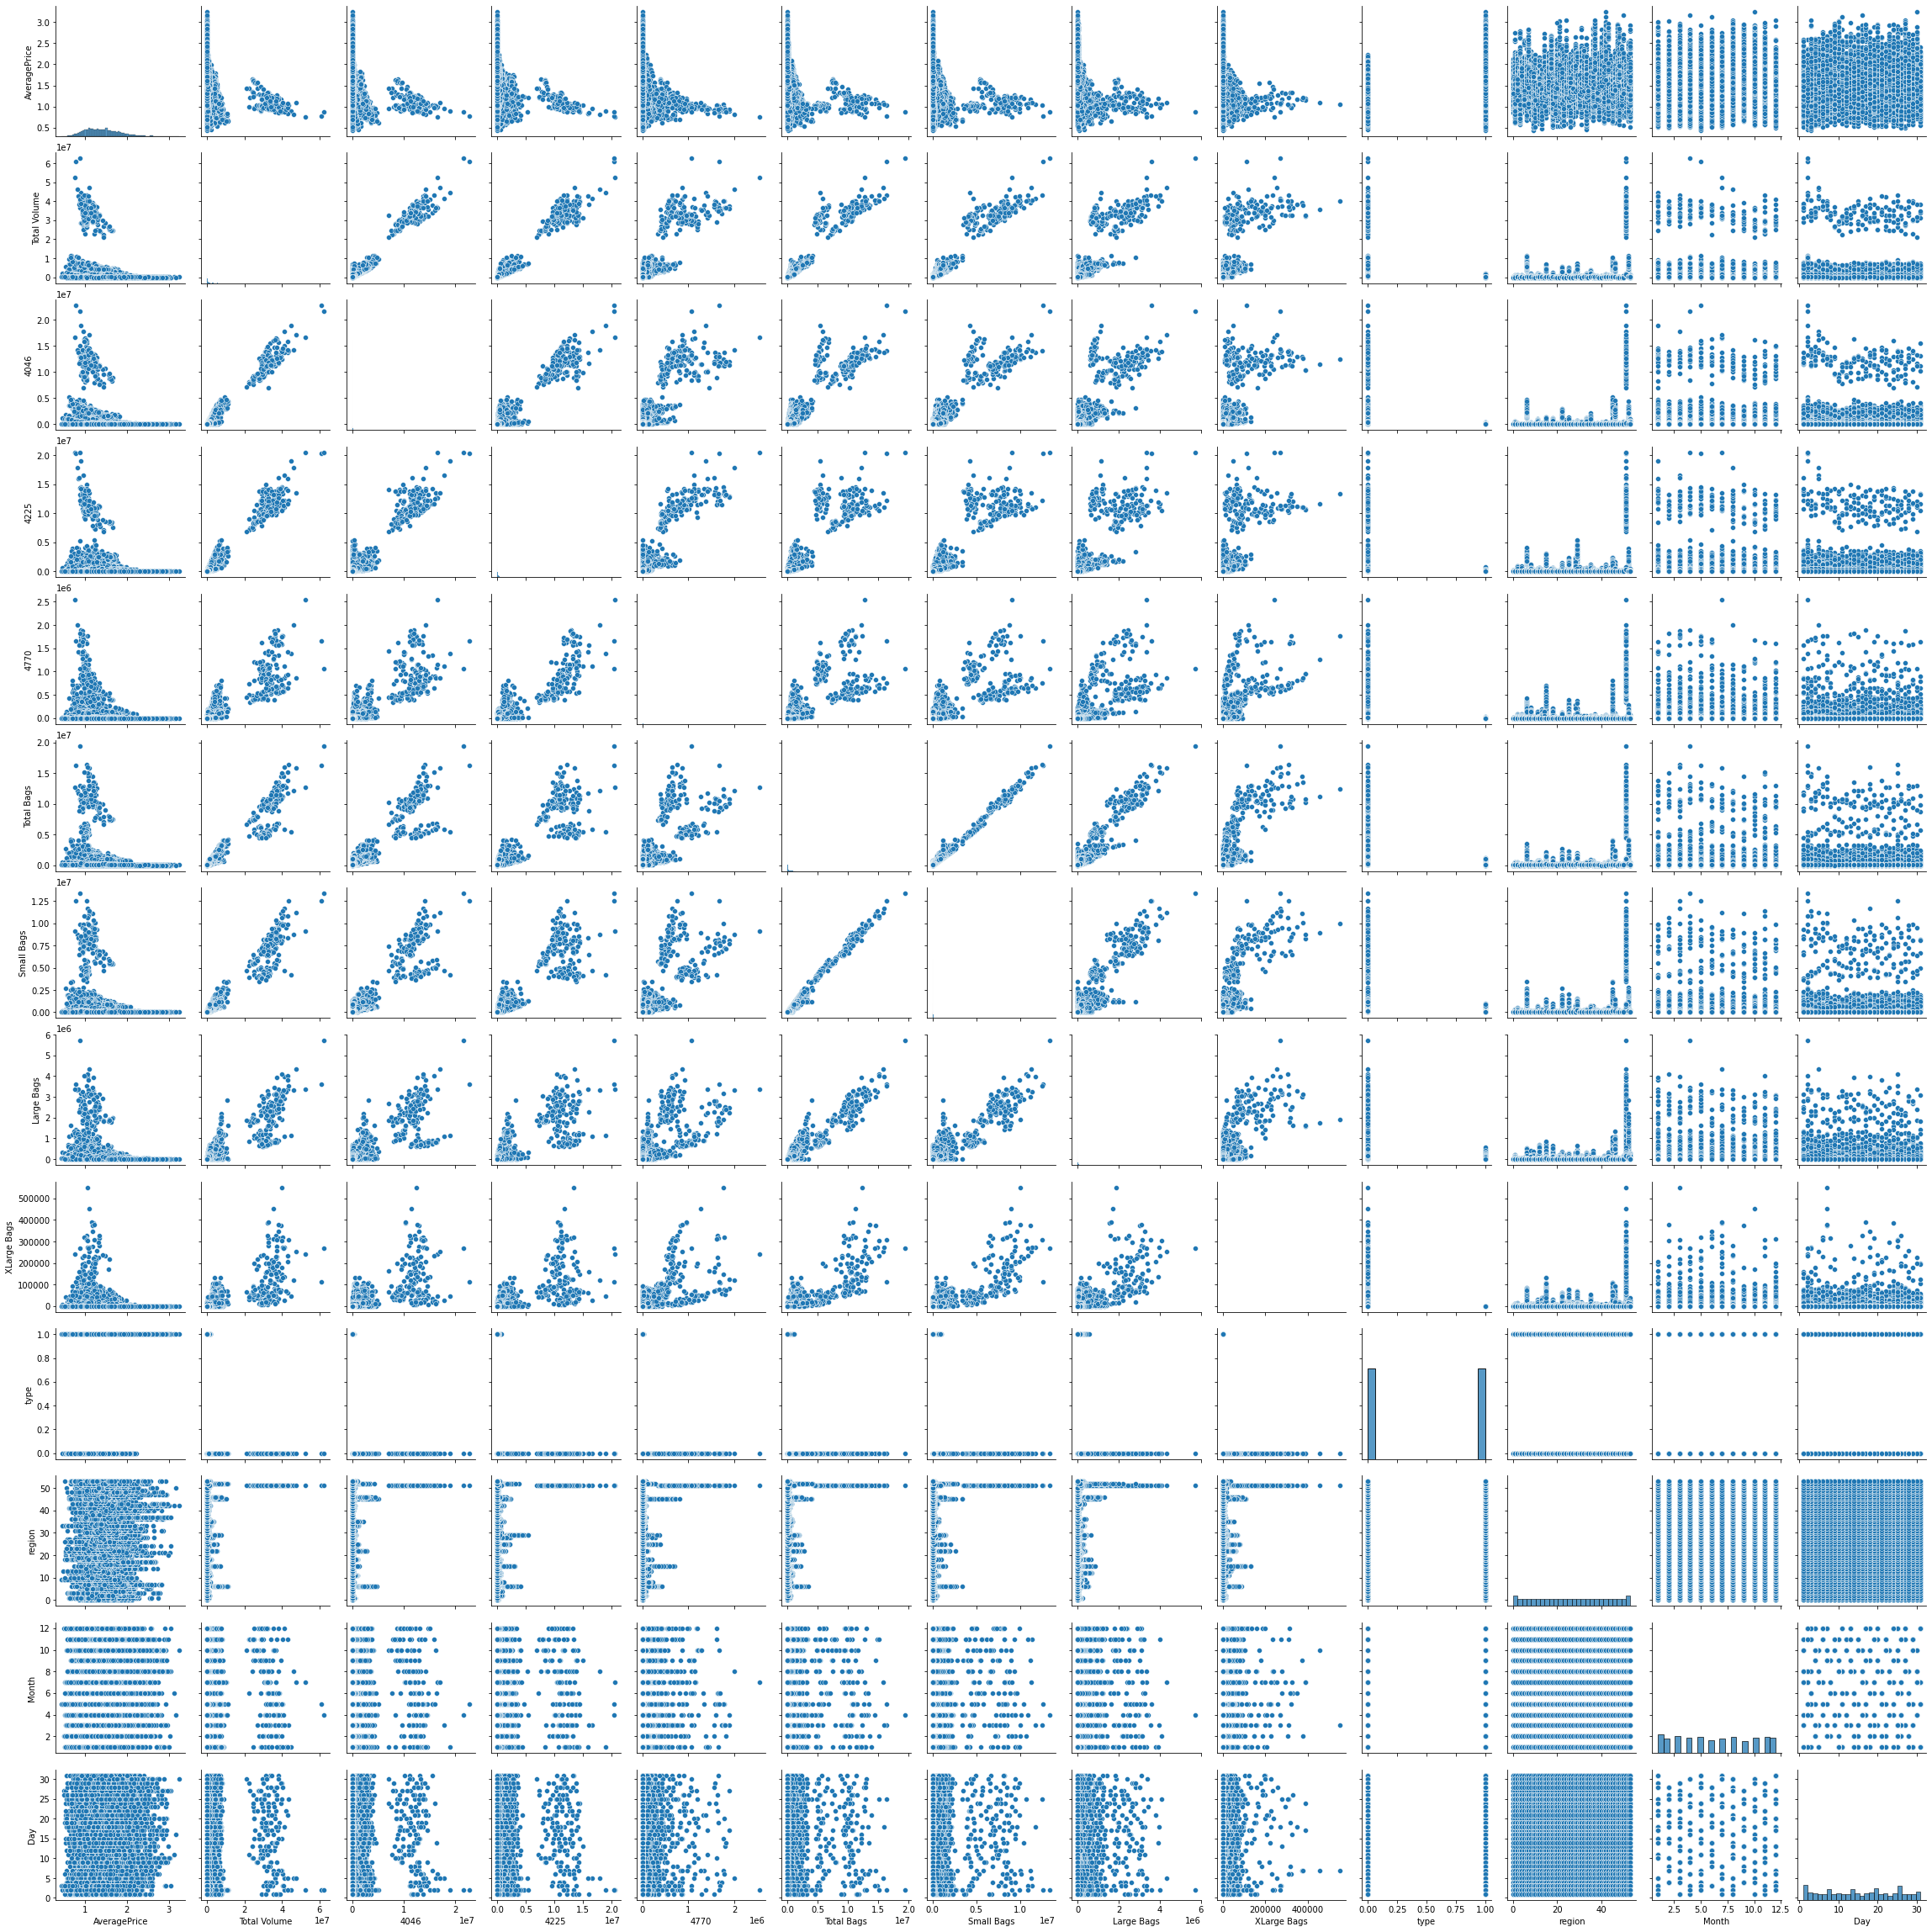

In [67]:
plt.figure(figsize=(25,25))
sns.pairplot(data)
plt.show()

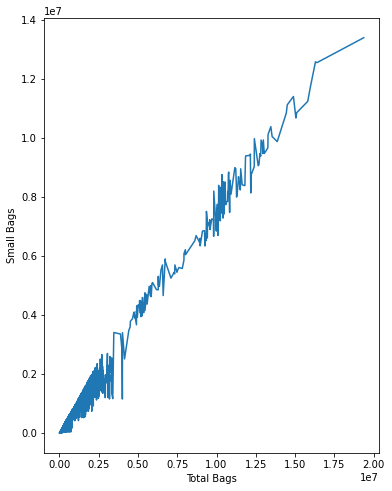

In [68]:
plt.figure(figsize=(6,8))
sns.lineplot('Total Bags','Small Bags',data=data)
plt.show()

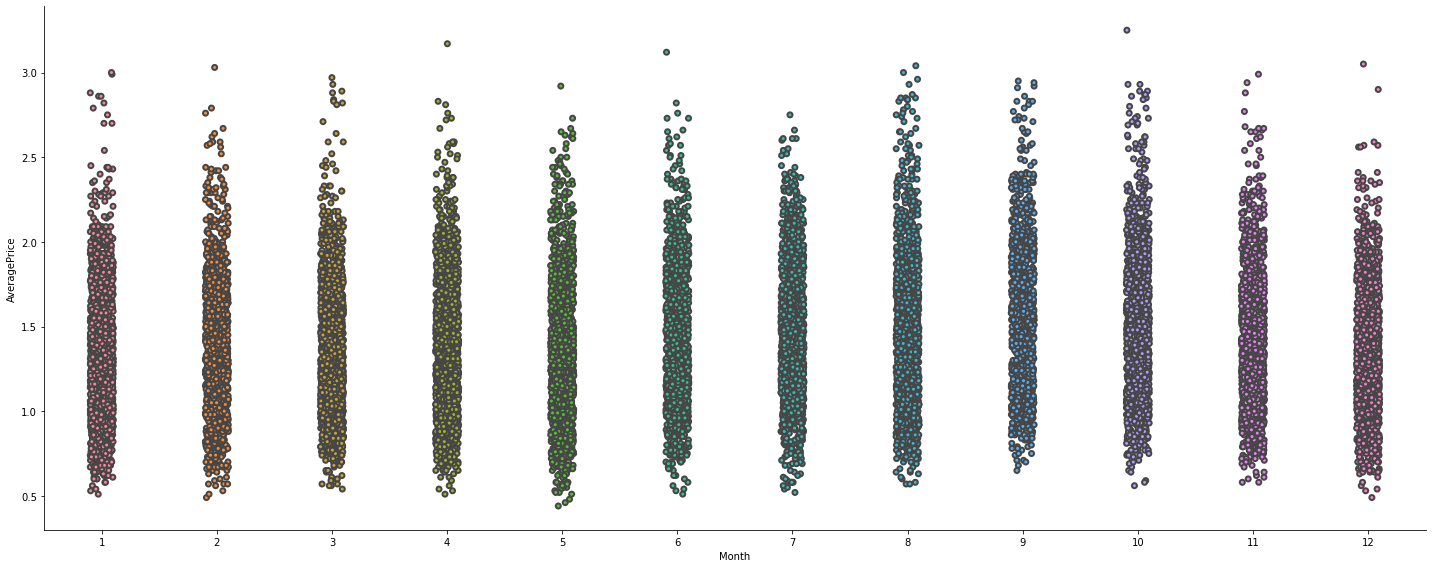

In [69]:
sns.catplot(x = "Month", y = "AveragePrice", kind="strip",data=data,height=8, linewidth=2, aspect=2.5)

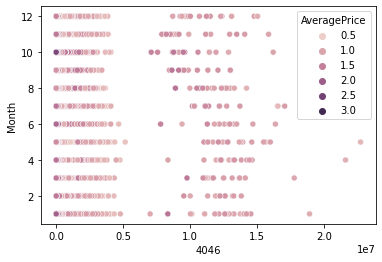

In [70]:
sns.scatterplot(x = "4046", y = "Month",hue='AveragePrice',data=data)
plt.show()

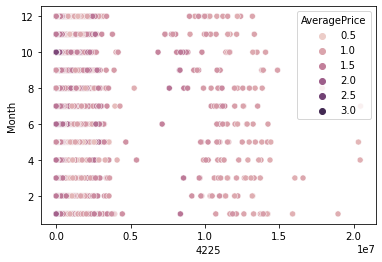

In [71]:
sns.scatterplot(x = "4225", y = "Month",hue='AveragePrice',data=data)
plt.show()

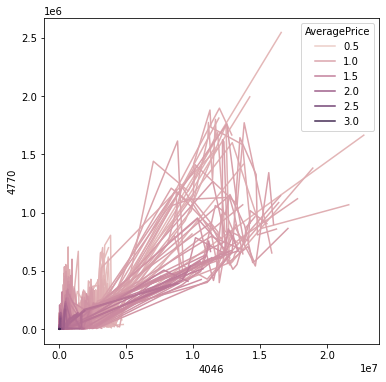

In [72]:
#plot count plot of 4046,4225,4770 
plt.figure(figsize=(6,6))
sns.lineplot('4046','4770',data=data,hue='AveragePrice')
plt.show()

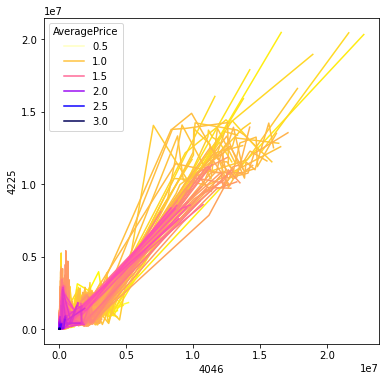

In [73]:
plt.figure(figsize=(6,6))
sns.lineplot('4046','4225',data=data,hue='AveragePrice',palette='gnuplot2_r')
plt.show()

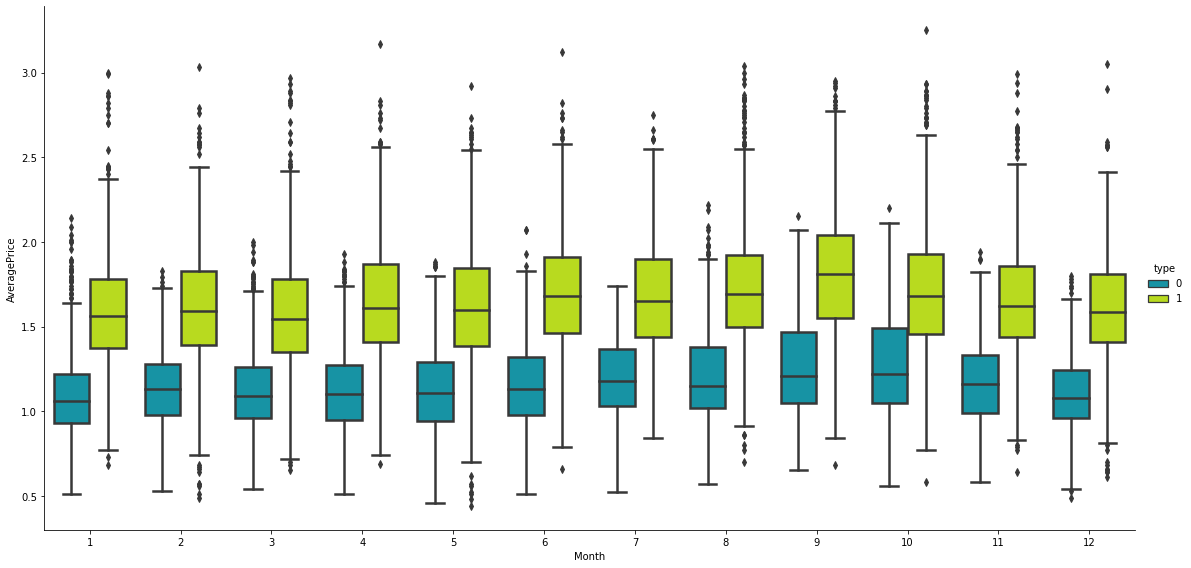

In [74]:
#Relation between month and Average PRice
sns.catplot(x="Month", y="AveragePrice", hue="type", 
            kind="box", data=data, height=8, linewidth=2.5, aspect=2,palette="nipy_spectral");

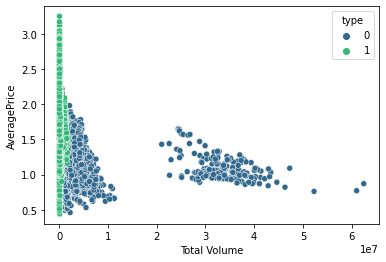

In [75]:
#Relation between total and average price
plt.figure(figsize=(6,4))
sns.scatterplot(x="Total Volume",y="AveragePrice",hue="type",data=data,palette="viridis")
plt.show()

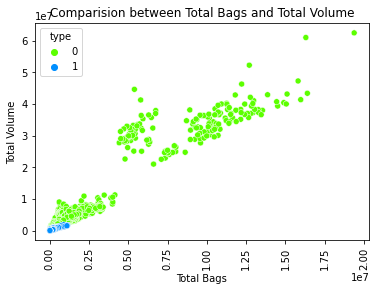

In [76]:
#Comparison between total bags and total volume
plt.figure(figsize=(6,4))
plt.title("Comparision between Total Bags and Total Volume")
sns.scatterplot(x='Total Bags',y='Total Volume',hue="type",data=data,palette="gist_rainbow")
plt.xticks(rotation=90)
plt.show()

KeyError: 'year'

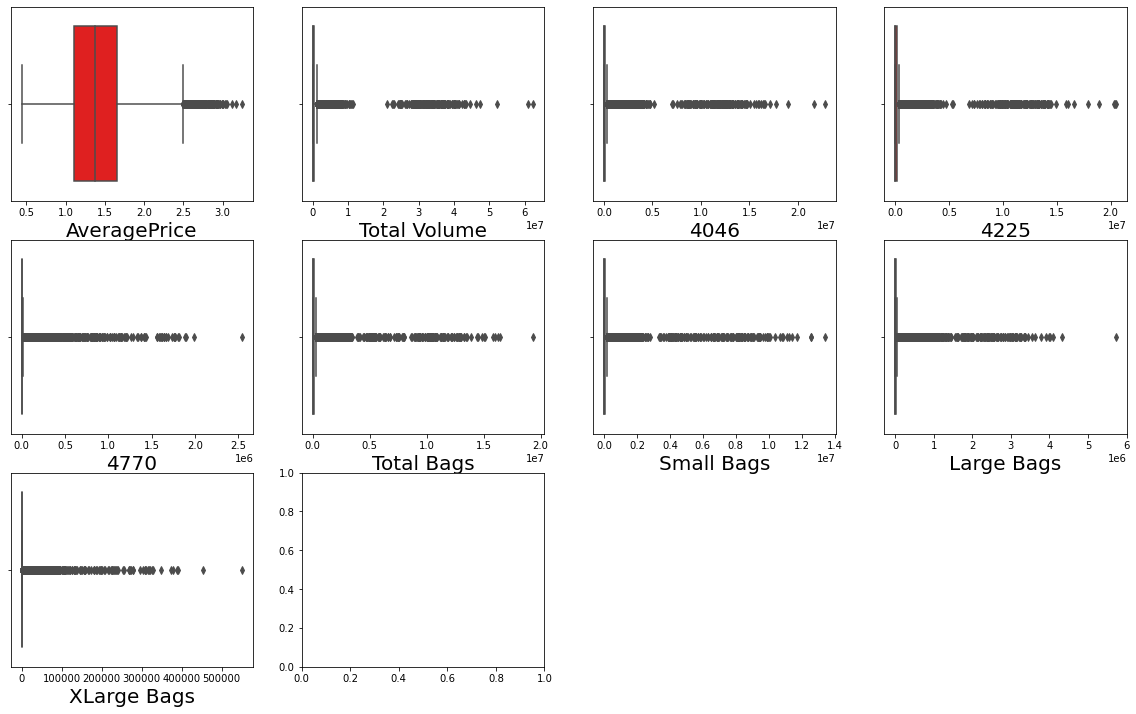

In [77]:
#Chaecking Outliers
numerical_col=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year','Month', 'Day']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(data[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Z Score Method

In [79]:
# Features containing outliers
feature_cols = data[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(feature_cols))

z

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558
1,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558
2,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558
3,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558
4,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558
...,...,...,...,...,...,...,...,...
18244,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558
18245,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558
18246,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558
18247,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558


In [80]:
new_df = data[(z<3).all(axis=1)] 
new_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,53,4,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,53,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,53,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,53,1,14


In [81]:
data.shape

(18249, 13)

In [82]:
new_df.shape

(17782, 13)

KeyError: 'year'

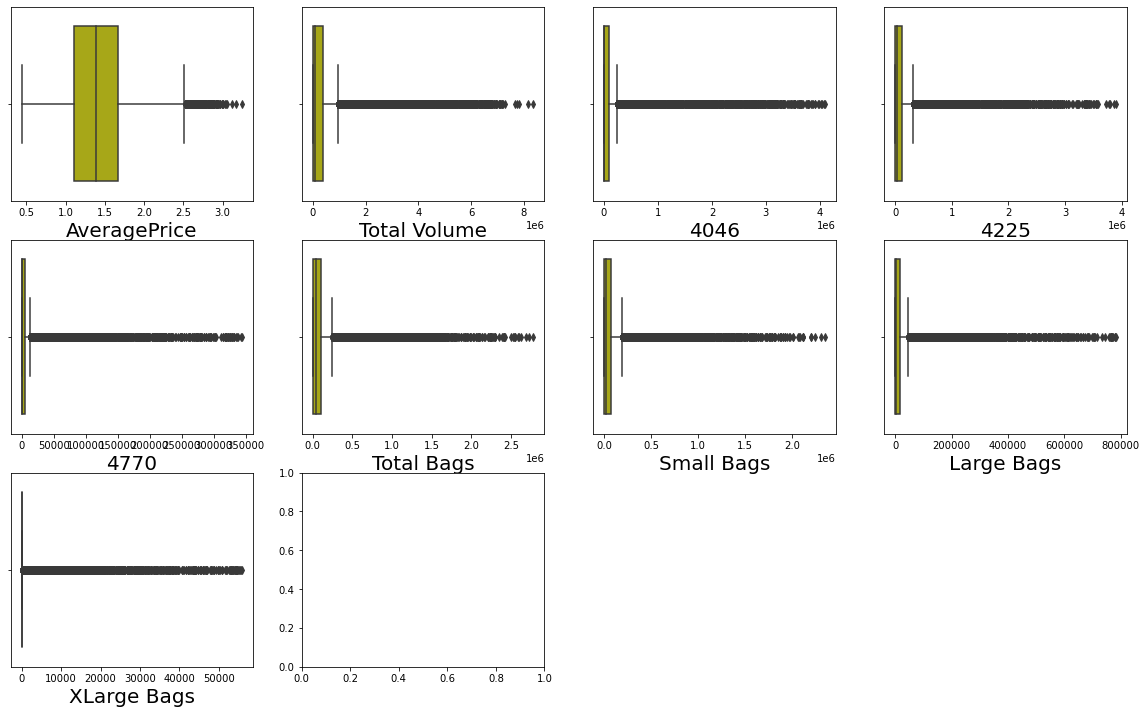

In [83]:
#plotting to check the status of outlier amount:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(new_df[column],color='y')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

KeyError: 'year'

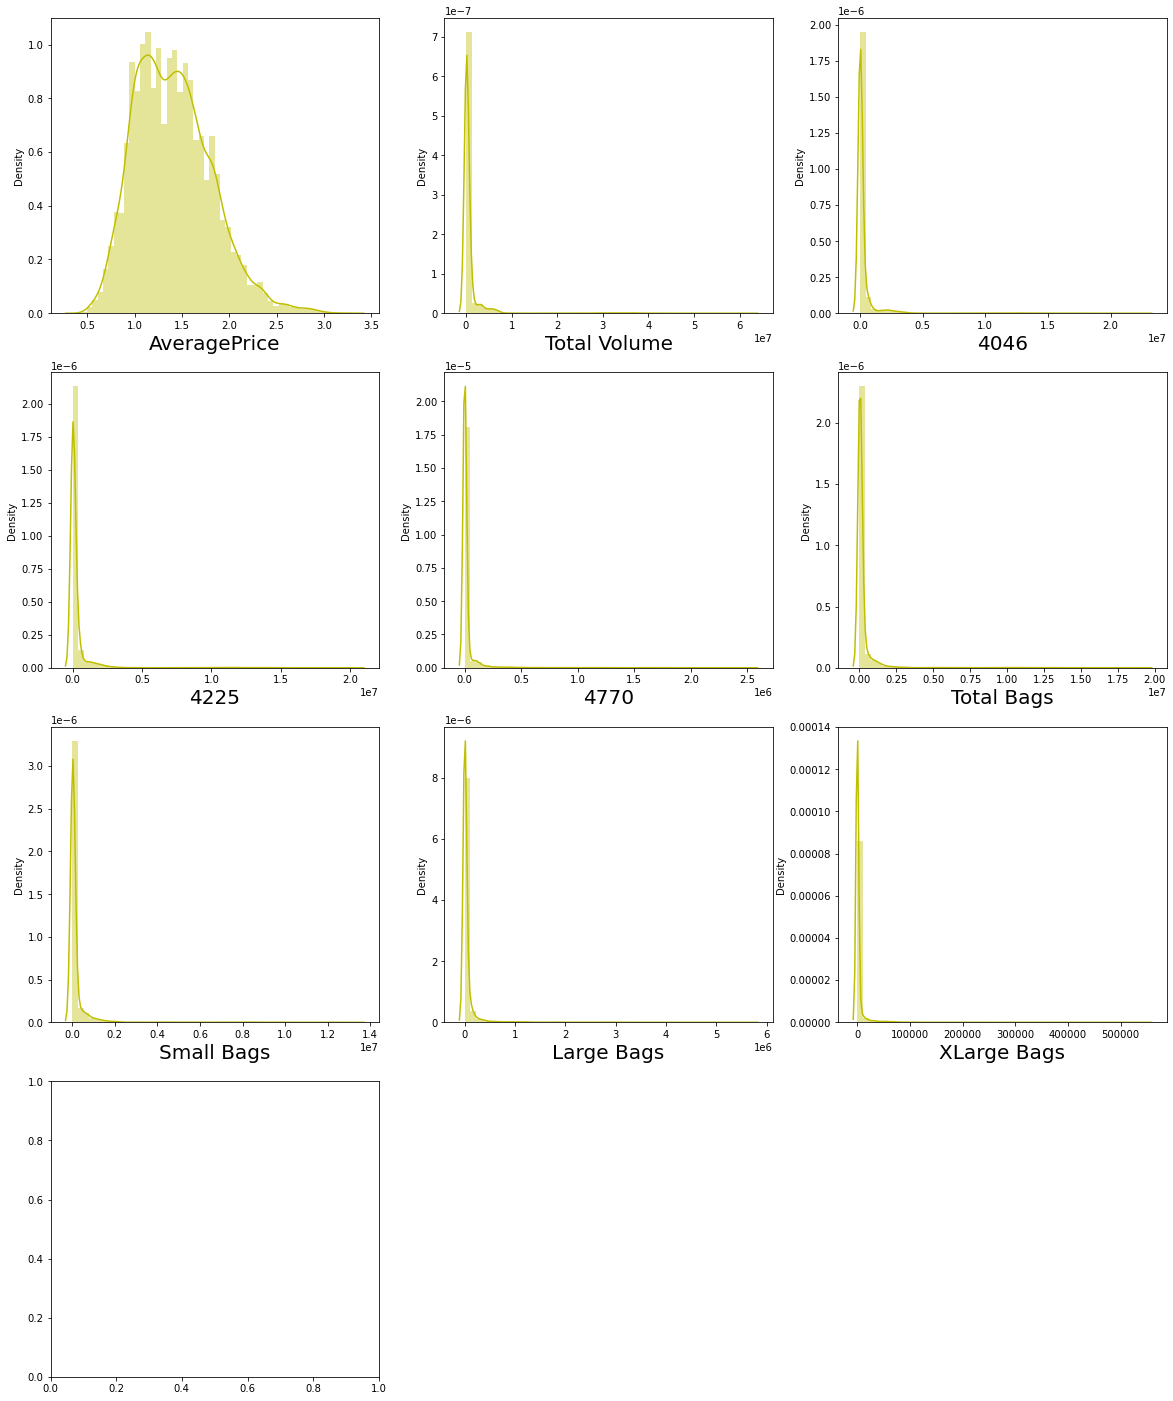

In [84]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(data[column],color='y')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [85]:
new_df.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
type           -0.052210
region          0.005773
Month           0.042069
Day            -0.004650
dtype: float64

In [86]:
# Removing skewness using yeo-johnson method to get better prediction
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
from sklearn.preprocessing import PowerTransformer
sk = PowerTransformer(method='yeo-johnson')
new_df[features] = sk.fit_transform(new_df[features].values)
new_df[features].head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702


In [87]:
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
type           -0.052210
region          0.005773
Month           0.042069
Day            -0.004650
dtype: float64

KeyError: 'year'

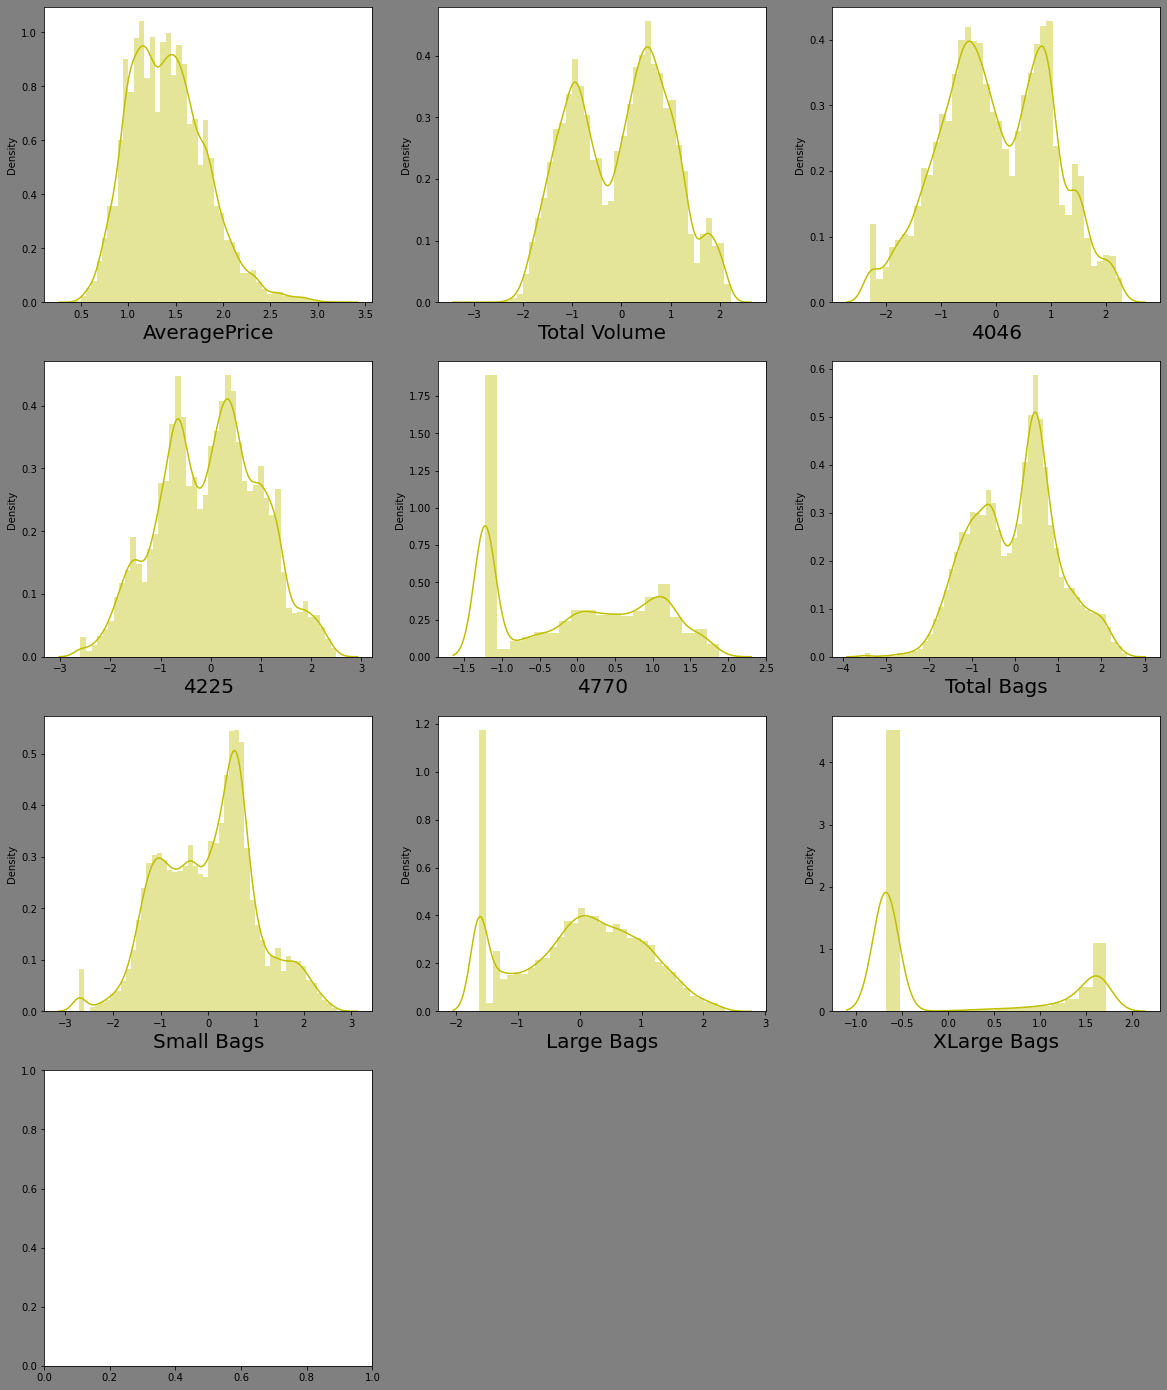

In [88]:
plt.figure(figsize=(20,25), facecolor='Grey')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(new_df[column],color='y')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [89]:
#Encoding
categorical_col = ["type","region"]
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)
new_df[categorical_col]

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
18244,1,53
18245,1,53
18246,1,53
18247,1,53


In [90]:
cor = new_df.corr()
cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Month,Day
AveragePrice,1.000000,-0.576829,-0.548618,-0.448579,-0.491320,-0.564616,-0.493621,-0.477879,-0.387285,0.608447,0.010428,0.071568,0.058266
Total Volume,-0.576829,1.000000,0.889083,0.924160,0.818568,0.939776,0.905098,0.681427,0.629592,-0.800828,0.065709,-0.015294,-0.010471
4046,-0.548618,0.889083,1.000000,0.764679,0.736523,0.799354,0.778765,0.601899,0.573880,-0.725826,0.159390,-0.014000,-0.009166
4225,-0.448579,0.924160,0.764679,1.000000,0.796799,0.818511,0.784901,0.614878,0.584508,-0.747722,0.032273,-0.019092,-0.008019
4770,-0.491320,0.818568,0.736523,0.796799,1.000000,0.761641,0.754305,0.548457,0.616413,-0.780988,0.037805,-0.012151,-0.000721
Total Bags,-0.564616,0.939776,0.799354,0.818511,0.761641,1.000000,0.949901,0.729652,0.613698,-0.725686,0.065996,-0.004350,-0.007650
Small Bags,-0.493621,0.905098,0.778765,0.784901,0.754305,0.949901,1.000000,0.566307,0.603334,-0.720466,0.051985,-0.002533,-0.003569
Large Bags,-0.477879,0.681427,0.601899,0.614878,0.548457,0.729652,0.566307,1.000000,0.452650,-0.500026,0.086573,-0.004320,-0.005833
XLarge Bags,-0.387285,0.629592,0.573880,0.584508,0.616413,0.613698,0.603334,0.452650,1.000000,-0.665587,-0.020865,0.015055,0.011483
type,0.608447,-0.800828,-0.725826,-0.747722,-0.780988,-0.725686,-0.720466,-0.500026,-0.665587,1.000000,0.021970,-0.003290,-0.003108


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0, 0.5, 'AveragePrice'),
  Text(0, 1.5, 'Total Volume'),
  Text(0, 2.5, '4046'),
  Text(0, 3.5, '4225'),
  Text(0, 4.5, '4770'),
  Text(0, 5.5, 'Total Bags'),
  Text(0, 6.5, 'Small Bags'),
  Text(0, 7.5, 'Large Bags'),
  Text(0, 8.5, 'XLarge Bags'),
  Text(0, 9.5, 'type'),
  Text(0, 10.5, 'region'),
  Text(0, 11.5, 'Month'),
  Text(0, 12.5, 'Day')])

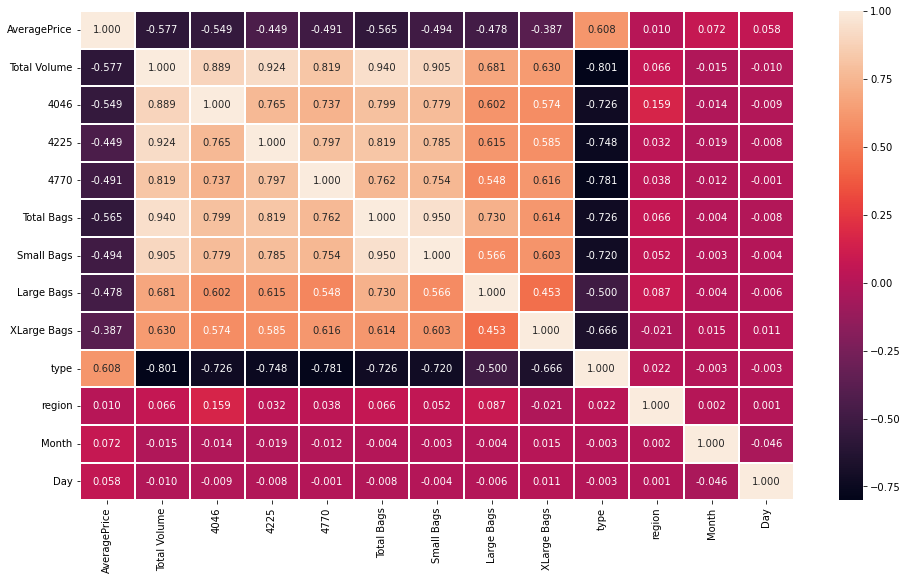

In [91]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(new_df.corr(),linewidths=.1,fmt='0.3f', annot = True)
plt.yticks(rotation=0)

In [92]:
cor['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
type            0.608447
Month           0.071568
Day             0.058266
region          0.010428
XLarge Bags    -0.387285
4225           -0.448579
Large Bags     -0.477879
4770           -0.491320
Small Bags     -0.493621
4046           -0.548618
Total Bags     -0.564616
Total Volume   -0.576829
Name: AveragePrice, dtype: float64

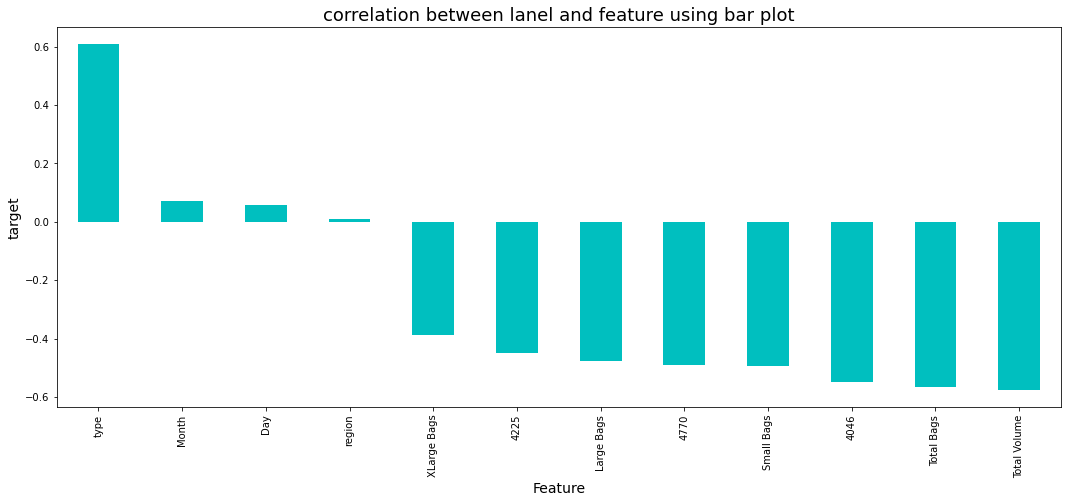

In [93]:
#Visualizing the correlation between label and features using bar plot
plt.figure(figsize=(18,7))
new_df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

In [94]:
new_df.drop("region",axis=1, inplace=True)
new_df.drop("XLarge Bags",axis=1, inplace=True)

In [95]:
x = new_df.drop("AveragePrice", axis=1)
y = new_df["AveragePrice"]

In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,Month,Day
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.026443,1.592359,1.281242
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.026443,1.592359,0.501783
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.026443,1.592359,-0.277677
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.026443,-0.108942,-0.389028
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.026443,1.308809,1.503945
...,...,...,...,...,...,...,...,...,...,...
17777,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,0.974238,-0.676043,-1.502542
17778,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,0.974238,-1.526694,1.392594
17779,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,0.974238,-1.526694,0.613134
17780,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,0.974238,-1.526694,-0.166326


In [97]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,51.301500,Total Volume
1,6.692953,4046
2,11.070760,4225
3,3.756608,4770
4,33.688753,Total Bags
5,16.541150,Small Bags
6,3.430540,Large Bags
7,3.315974,type
8,1.004390,Month
9,1.003039,Day


In [98]:
x.drop("Total Bags",axis=1, inplace=True)

In [99]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,36.615795,Total Volume
1,5.896758,4046
2,9.813098,4225
3,3.756546,4770
4,7.115955,Small Bags
5,1.984623,Large Bags
6,3.279851,type
7,1.004219,Month
8,1.003034,Day


In [100]:
maxAccu=0
maxRS=0
for i in range(200,500):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = KNN()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.6613236982070594  on Random_state  327


In [101]:
#Creating train test split at best randoem state
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [102]:
# Checking R2 score for  Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
pred_RFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_RFR))

# Mean Absolute Error (MAE)
print('MAE:',mean_absolute_error(y_test, pred_RFR))

# Mean Squared Error (MSE)
print('MSE:',mean_squared_error(y_test, pred_RFR))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(mean_squared_error(y_test, pred_RFR)))

# Checking cv score for Random Forest Regression
print("Cross_Validaton_Score",cross_val_score(RFR,x,y,cv=5).mean())


print ("The difference between R2 score and CV is", (r2_score(y_test,pred_RFR)-(cross_val_score(RFR,x,y,cv=5).mean())))

R2_Score: 0.7811776779624788
MAE: 0.13503231490159323
MSE: 0.035352477214620426
RMSE: 0.1880225444318325
Cross_Validaton_Score 0.10502499243500227
The difference between R2 score and CV is 0.6803012851754132


In [103]:
# Checking R2 score for Support Vector Machine Regressor
svr=SVR()
svr.fit(x_train,y_train)

# prediction
predsvr=svr.predict(x_test)
print('R2_Score:',r2_score(y_test,predsvr))
print('MAE:',mean_absolute_error(y_test, predsvr))
print('MSE:',mean_squared_error(y_test, predsvr))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predsvr)))

# Checking cv score for SVR 
print("Cross_Validaton_Score",cross_val_score(svr,x,y,cv=5).mean())

R2_Score: 0.6485480982764416
MAE: 0.17577944562351805
MSE: 0.05677983503706112
RMSE: 0.23828519684835883
Cross_Validaton_Score 0.07862920257728341


In [104]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('MAE:',mean_absolute_error(y_test, predLR))
print('MSE:',mean_squared_error(y_test, predLR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predLR)))

# Checking cv score for Linear Regression
print("Cross_Validaton_Score",cross_val_score(LR,x,y,cv=5).mean())

R2_score: 0.49813311484233824
MAE: 0.22012691147714356
MSE: 0.08108056553419866
RMSE: 0.28474649345373626
Cross_Validaton_Score -0.004474062802094258


In [105]:
# Checking R2 score for KNN Regressor
knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',mean_absolute_error(y_test, predknn))
print('MSE:',mean_squared_error(y_test, predknn))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predknn)))

# Checking cv score for KNN
print("Cross_Validaton_Score",cross_val_score(knn,x,y,cv=5).mean())

R2_Score: 0.6613236982070594
MAE: 0.17569859418931585
MSE: 0.054715835801312084
RMSE: 0.23391416331918014
Cross_Validaton_Score -0.08173039943719251


In [106]:
parameters = {'n_neighbors':[2,3,4,5,6],
              'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
              'leaf_size':[10,20,30,40,50],
              'weights':['uniform','distance']}
GCV=GridSearchCV(KNN(),parameters,cv=5)

In [107]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [108]:
GCV.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 6, 'weights': 'distance'}

In [109]:
avocado_model =KNN(algorithm='auto', leaf_size=10, n_neighbors=4, weights='distance')
avocado_model.fit(x_train, y_train)
pred = avocado_model.predict(x_test)
print("RMSE value:",np.sqrt(mean_squared_error(y_test, pred_RFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 0.1880225444318325
R2_Score: 65.91893145461789


In [110]:
#Model Saving
import joblib
joblib.dump(avocado_model,"Avocado_project.pkl")

['Avocado_project.pkl']

In [111]:
#Predication pf saved model
model=joblib.load("Avocado_project.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([1.89142555, 1.97529734, 1.04302561, ..., 1.85888177, 1.09035022,
       1.12773019])

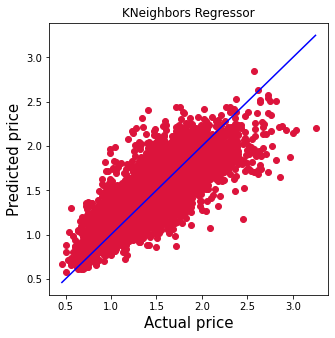

In [112]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, prediction, c='crimson')
plt1 = max(max(prediction), max(y_test))
plt2 = min(min(prediction), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.title("KNeighbors Regressor")
plt.xlabel('Actual price', fontsize=15)
plt.ylabel('Predicted price', fontsize=15)
plt.show()

In [113]:
a=np.array(y_test)
result=pd.DataFrame({'Original':a,'Predicted':prediction},index=range(len(a)))
result

,Original,Predicted
0,1.79,1.891426
1,1.96,1.975297
2,1.03,1.043026
3,1.67,1.651818
4,1.41,1.201665
...,...,...
5330,1.23,1.204472
5331,1.35,1.563319
5332,1.95,1.858882
5333,1.07,1.090350
